# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Loading dataset

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
df

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout


In [4]:
df.shape

(76518, 38)

In [5]:
test_data = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')
test_data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


# Data exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [7]:
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

# Data visualization

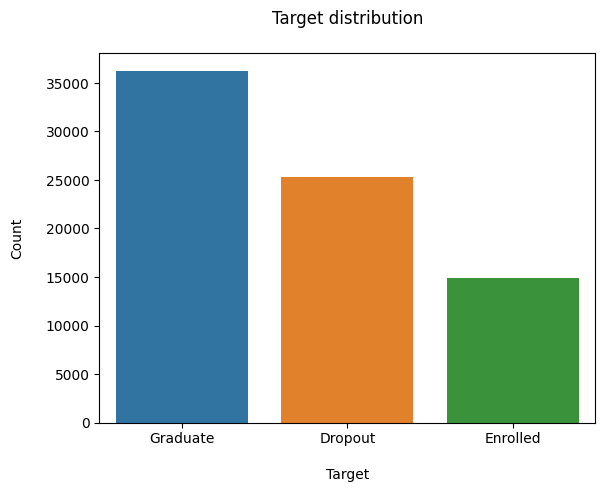

In [8]:
sns.countplot(data=df, x='Target')
plt.ylabel('Count\n')
plt.xlabel('\nTarget')
plt.title('Target distribution\n')
plt.show()

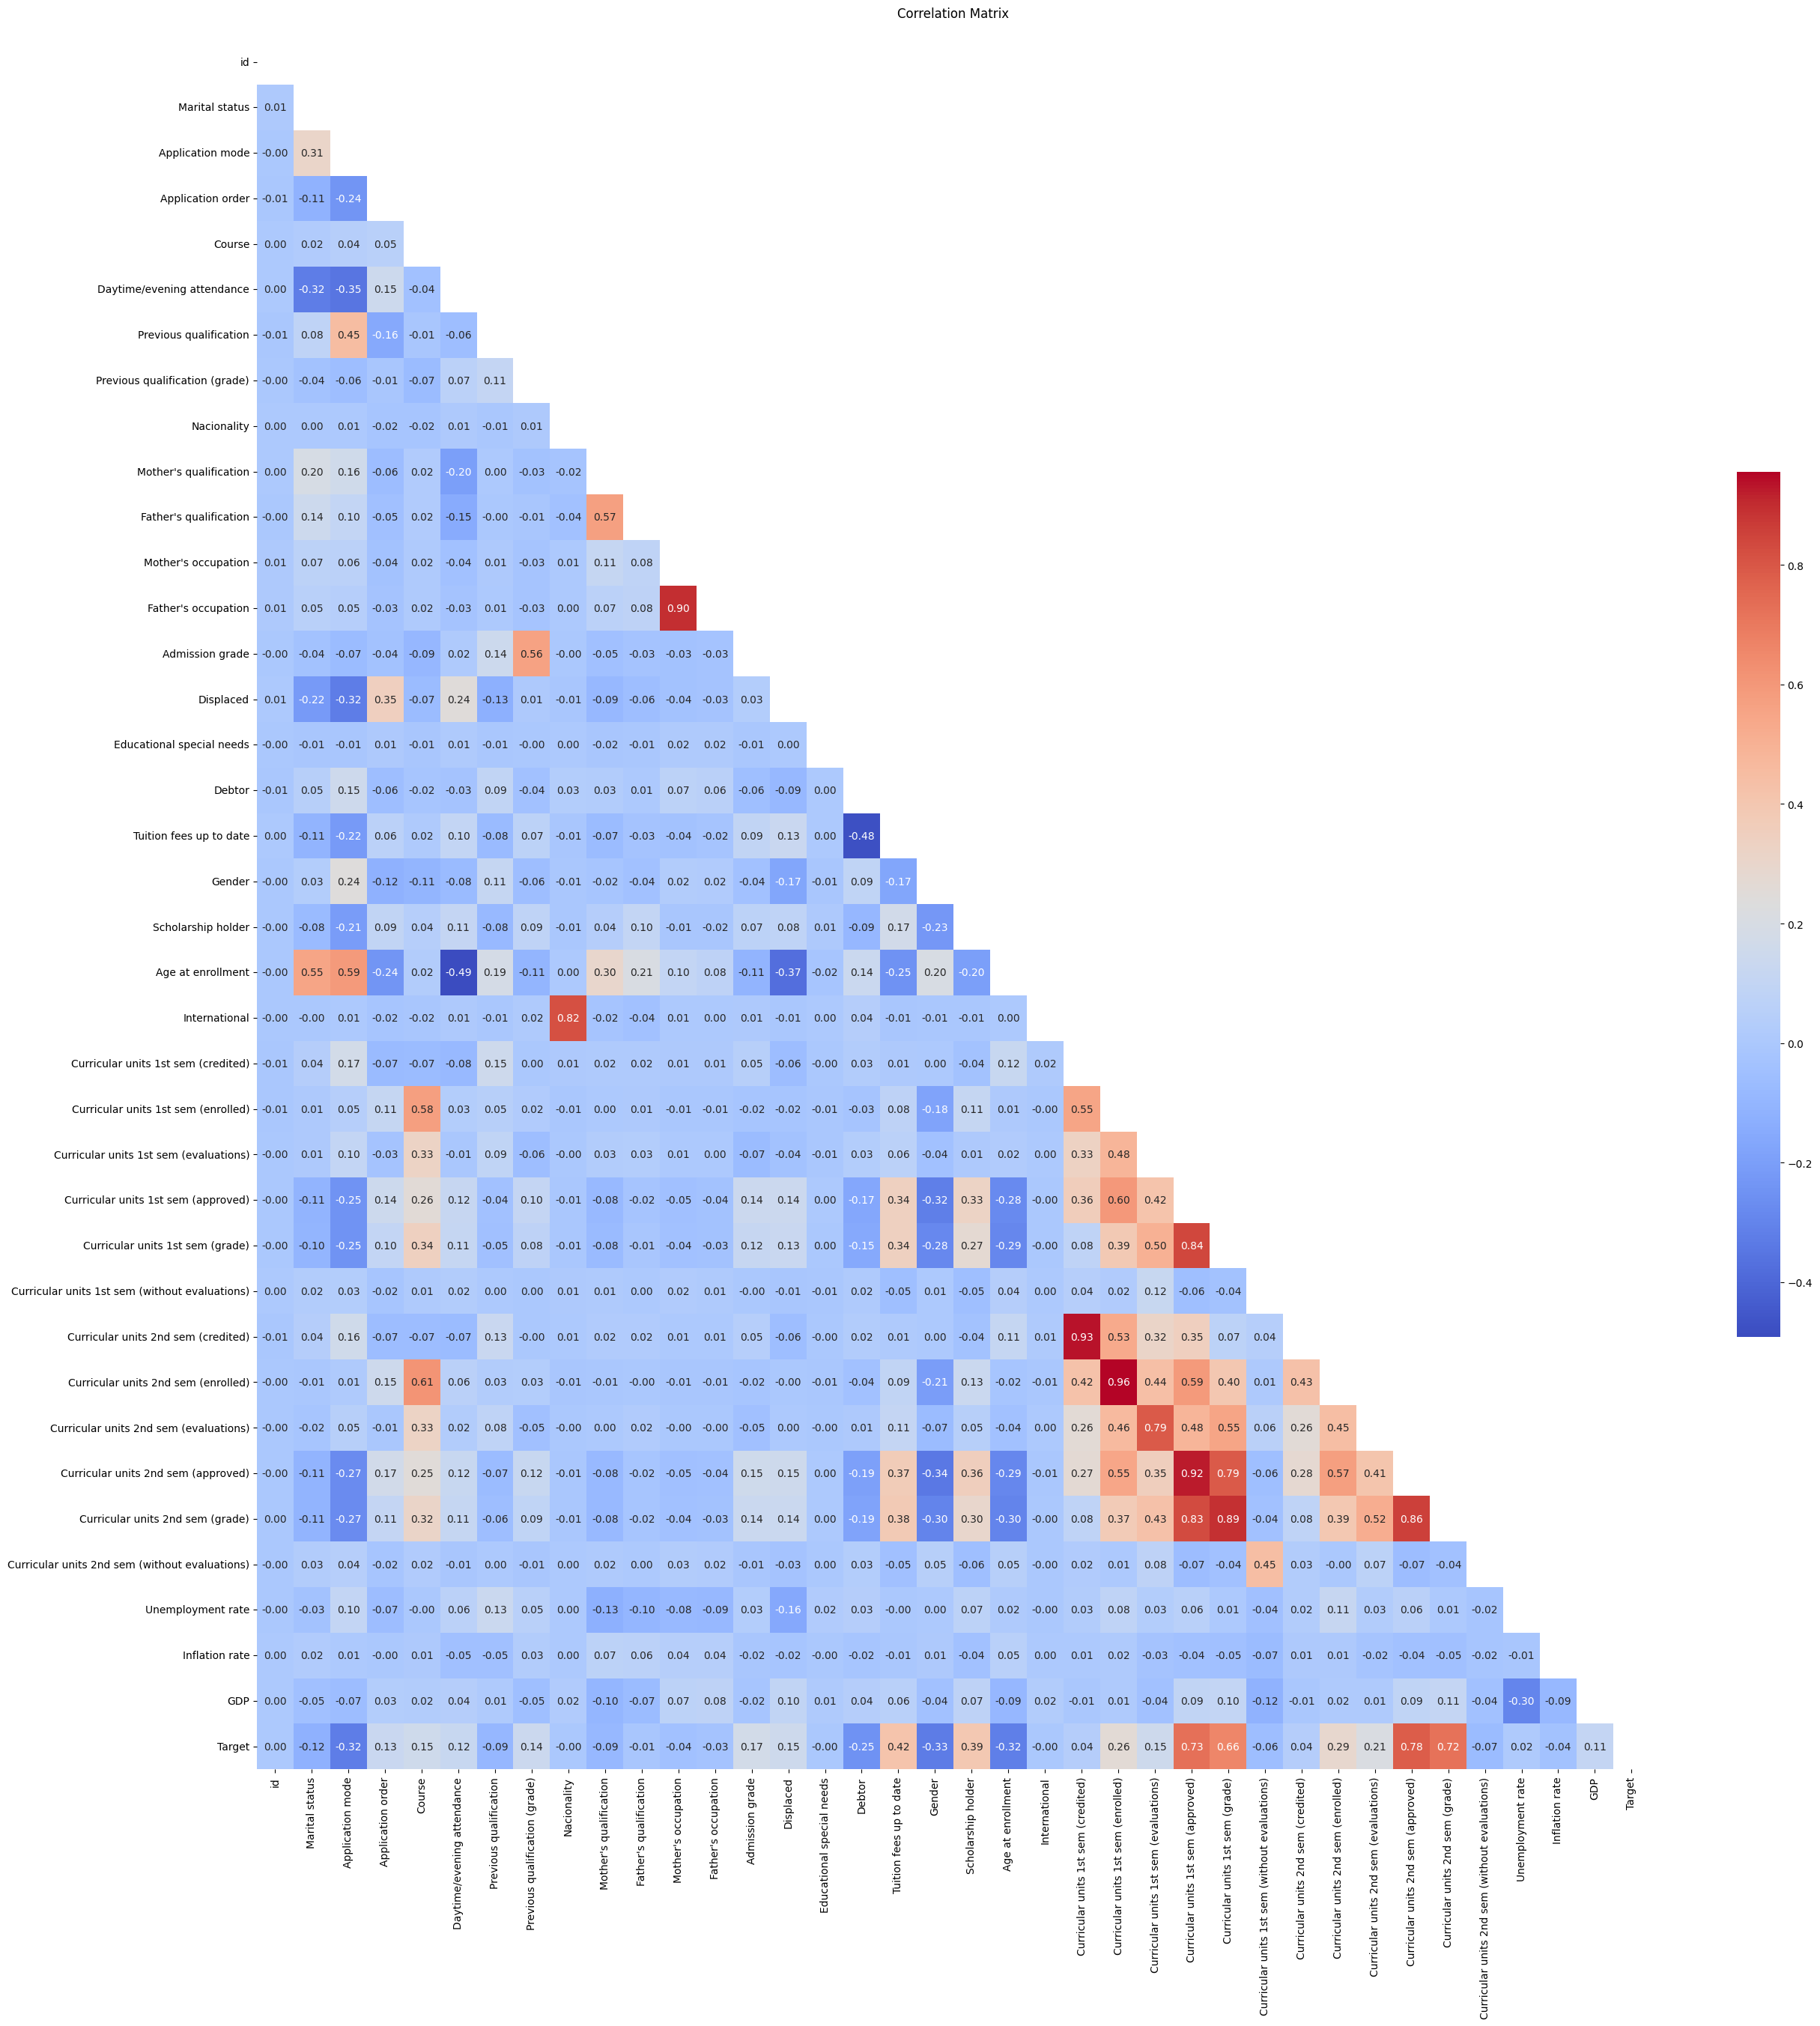

In [9]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

corr = df.corr()

plt.figure(figsize=(30, 30))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', cbar_kws={'shrink': .5}, fmt=".2f")
plt.title('Correlation Matrix\n')
plt.show()

# Data preprocessing

Dropping low correlation columns

In [10]:
df.drop(['id'], axis=1, inplace=True)

Unique value exploration

In [11]:
for col in df.columns:
    if (col in test_data.columns):
        print(f"{col} : \n{df[col].unique()}")
        print(f"{col} : \n{test_data[col].unique()}\n")

Marital status : 
[1 2 4 3 5 6]
Marital status : 
[1 2 4 5 6 3]

Application mode : 
[ 1 17 39 44  7 18 15 16 53 43 51 42 10  5 12 27  2 26  4 35  9  3]
Application mode : 
[ 1 44 39 17 16 42 18  7 15 43 53 51  5 10 14 27  2 35 19  3]

Application order : 
[1 2 3 6 4 5 0 9]
Application order : 
[1 4 2 3 6 5 9 0]

Course : 
[9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Course : 
[9500 9238 9147 9670 9773 9003 9254 9119 9085 9991  171 9853 9130 9070
 8014 9556   33 7500 9257 2105 4147]

Daytime/evening attendance : 
[1 0]
Daytime/evening attendance : 
[1 0]

Previous qualification : 
[ 1 19 39 40 12  3  2 42  4  9 11  6 15 38 10 43 14 37  5 36 17]
Previous qualification : 
[ 1 39 19  9  3 12 40 42 10  2  6 43 38  4 15 17 14  5 11 16]

Previous qualification (grade) : 
[126.  125.  137.  131.  132.  133.1 130.  135.  120.  140.  154.  133.
 151.  122.  138.  145.  139.  110.  114.  129.  128.  150.  143.  117.
 161.  121.  141.  147.  13

Value counts

In [12]:
for col in df.columns:
    print(f"{df[col].value_counts()}\n")

Marital status
1    70189
2     5296
4      866
5      116
6       35
3       16
Name: count, dtype: int64

Application mode
1     35227
17    16523
39    14519
44     3012
43     2671
7      1498
18     1256
42      551
51      442
16      265
53      225
15      183
5        87
10       43
2         8
27        2
12        1
26        1
4         1
35        1
9         1
3         1
Name: count, dtype: int64

Application order
1    54381
2     8875
3     5364
4     3822
5     2125
6     1947
0        3
9        1
Name: count, dtype: int64

Course
9500    12074
9773     8214
9238     7935
9147     7741
9254     5425
9085     5373
9670     4760
9991     4057
9003     3733
9070     3281
9853     3198
9119     3004
171      2859
8014     2438
9130     1606
9556      746
33         72
979         1
39          1
Name: count, dtype: int64

Daytime/evening attendance
1    70038
0     6480
Name: count, dtype: int64

Previous qualification
1     67183
19     2947
39     2928
3      1401
12  

Encoding Target column

In [13]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

# X-y split

In [14]:
y = df['Target']
x = df.drop(['Target'], axis=1)

# Train test split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((57388, 36), (19130, 36), (57388,), (19130,))

# Model Building

### K Neighbours

In [17]:
knn = KNeighborsClassifier()

In [18]:
knn.fit(x_train, y_train)

knn_train_pred = knn.predict(x_train)
knn_pred = knn.predict(x_test)

knn_train_acc = accuracy_score(y_train, knn_train_pred)
knn_acc = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, average='weighted')
knn_recall = recall_score(y_test, knn_pred, average='weighted')
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

print(f"Accuracy: {knn_acc}\n")
print(f"Training Accuracy: {knn_train_acc}\n")
print(f"Precision: {knn_precision}\n")
print(f"Recall: {knn_recall}\n")
print(f"F1 Score: {knn_f1}\n")

Accuracy: 0.7337166753789859

Training Accuracy: 0.8083571478357845

Precision: 0.7278303865220115

Recall: 0.7337166753789859

F1 Score: 0.7296924311607677



In [19]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      6355
           1       0.49      0.44      0.46      3735
           2       0.78      0.84      0.81      9040

    accuracy                           0.73     19130
   macro avg       0.69      0.68      0.68     19130
weighted avg       0.73      0.73      0.73     19130



### Gaussian Naive Bayes

In [20]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

gnb_train_pred = gnb.predict(x_train)
gnb_pred = gnb.predict(x_test)

gnb_train_acc = accuracy_score(y_train, gnb_train_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_f1 = f1_score(y_test, gnb_pred, average='weighted')

print(f"Accuracy: {gnb_acc}\n")
print(f"Training Accuracy: {gnb_train_acc}\n")
print(f"Precision: {gnb_precision}\n")
print(f"Recall: {gnb_recall}\n")
print(f"F1 Score: {gnb_f1}\n")

Accuracy: 0.7705697856769472

Training Accuracy: 0.7690806440370809

Precision: 0.765658275664302

Recall: 0.7705697856769472

F1 Score: 0.7656558660899664



In [21]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      6355
           1       0.53      0.45      0.49      3735
           2       0.79      0.89      0.84      9040

    accuracy                           0.77     19130
   macro avg       0.73      0.71      0.72     19130
weighted avg       0.77      0.77      0.77     19130



### Decision Tree

In [22]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=8)

dtc.fit(x_train, y_train)

dtc_train_pred = dtc.predict(x_train)
dtc_pred = dtc.predict(x_test)

dtc_train_acc = accuracy_score(y_train, dtc_train_pred)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_precision = precision_score(y_test, dtc_pred, average='weighted')
dtc_recall = recall_score(y_test, dtc_pred, average='weighted')
dtc_f1 = f1_score(y_test, dtc_pred, average='weighted')

print(f"Accuracy: {dtc_acc}\n")
print(f"Training Accuracy: {dtc_train_acc}\n")
print(f"Precision: {dtc_precision}\n")
print(f"Recall: {dtc_recall}\n")
print(f"F1 Score: {dtc_f1}\n")

Accuracy: 0.812807109252483

Training Accuracy: 0.8250505332125183

Precision: 0.8164118446635652

Recall: 0.812807109252483

F1 Score: 0.8130921475534023



In [23]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      6355
           1       0.59      0.61      0.60      3735
           2       0.84      0.90      0.87      9040

    accuracy                           0.81     19130
   macro avg       0.78      0.77      0.78     19130
weighted avg       0.82      0.81      0.81     19130



### Random Forest

In [24]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=20, max_features='sqrt', n_estimators=400)

rfc.fit(x_train, y_train)

rfc_train_pred = rfc.predict(x_train)
rfc_pred = rfc.predict(x_test)

rfc_train_acc = accuracy_score(y_train, rfc_train_pred)
rfc_acc = accuracy_score(y_test, rfc_pred)
rfc_precision = precision_score(y_test, rfc_pred, average='weighted')
rfc_recall = recall_score(y_test, rfc_pred, average='weighted')
rfc_f1 = f1_score(y_test, rfc_pred, average='weighted')

print(f"Accuracy: {rfc_acc}\n")
print(f"Training Accuracy: {rfc_train_acc}\n")
print(f"Precision: {rfc_precision}\n")
print(f"Recall: {rfc_recall}\n")
print(f"F1 Score: {rfc_f1}\n")

Accuracy: 0.8240460010454783

Training Accuracy: 0.9789503031992751

Precision: 0.8228541608603075

Recall: 0.8240460010454783

F1 Score: 0.8215876586441629



In [25]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      6355
           1       0.63      0.58      0.61      3735
           2       0.84      0.93      0.88      9040

    accuracy                           0.82     19130
   macro avg       0.79      0.78      0.78     19130
weighted avg       0.82      0.82      0.82     19130



### XG Boost

In [26]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

xgb_train_pred = xgb.predict(x_train)
xgb_pred = xgb.predict(x_test)

xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred, average='weighted')
xgb_recall = recall_score(y_test, xgb_pred, average='weighted')
xgb_f1 = f1_score(y_test, xgb_pred, average='weighted')

print(f"Accuracy: {xgb_acc}\n")
print(f"Training Accuracy: {xgb_train_acc}\n")
print(f"Precision: {xgb_precision}\n")
print(f"Recall: {xgb_recall}\n")
print(f"F1 Score: {xgb_f1}\n")

Accuracy: 0.8291688447464715

Training Accuracy: 0.8852024813549871

Precision: 0.8272893781147328

Recall: 0.8291688447464715

F1 Score: 0.8271195810282934



In [27]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      6355
           1       0.65      0.60      0.63      3735
           2       0.85      0.92      0.88      9040

    accuracy                           0.83     19130
   macro avg       0.80      0.79      0.79     19130
weighted avg       0.83      0.83      0.83     19130



### AdaBoost

In [28]:
abc = AdaBoostClassifier()

abc.fit(x_train, y_train)

abc_train_pred = abc.predict(x_train)
abc_pred = abc.predict(x_test)

abc_train_acc = accuracy_score(y_train, abc_train_pred)
abc_acc = accuracy_score(y_test, abc_pred)
abc_precision = precision_score(y_test, abc_pred, average='weighted')
abc_recall = recall_score(y_test, abc_pred, average='weighted')
abc_f1 = f1_score(y_test, abc_pred, average='weighted')

print(f"Accuracy: {abc_acc}\n")
print(f"Training Accuracy: {abc_train_acc}\n")
print(f"Precision: {abc_precision}\n")
print(f"Recall: {abc_recall}\n")
print(f"F1 Score: {abc_f1}\n")

Accuracy: 0.8154208050182958

Training Accuracy: 0.8209033247368788

Precision: 0.8161716159659718

Recall: 0.8154208050182958

F1 Score: 0.8141670783938892



In [29]:
print(classification_report(y_test, abc_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      6355
           1       0.61      0.59      0.60      3735
           2       0.84      0.91      0.88      9040

    accuracy                           0.82     19130
   macro avg       0.78      0.77      0.78     19130
weighted avg       0.82      0.82      0.81     19130



### Gradient Boosting

In [30]:
gbr = GradientBoostingClassifier()

gbr.fit(x_train, y_train)

gbr_train_pred = gbr.predict(x_train)
gbr_pred = gbr.predict(x_test)

gbr_train_acc = accuracy_score(y_train, gbr_train_pred)
gbr_acc = accuracy_score(y_test, gbr_pred)
gbr_precision = precision_score(y_test, gbr_pred, average='weighted')
gbr_recall = recall_score(y_test, gbr_pred, average='weighted')
gbr_f1 = f1_score(y_test, gbr_pred, average='weighted')

print(f"Accuracy: {gbr_acc}\n")
print(f"Training Accuracy: {gbr_train_acc}\n")
print(f"Precision: {gbr_precision}\n")
print(f"Recall: {gbr_recall}\n")
print(f"F1 Score: {gbr_f1}\n")

Accuracy: 0.8238891792995295

Training Accuracy: 0.8312364954345857

Precision: 0.8226945115013409

Recall: 0.8238891792995295

F1 Score: 0.8219891178784864



In [31]:
print("Classification Report:\n", classification_report(y_test, gbr_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      6355
           1       0.63      0.59      0.61      3735
           2       0.85      0.92      0.88      9040

    accuracy                           0.82     19130
   macro avg       0.79      0.78      0.78     19130
weighted avg       0.82      0.82      0.82     19130



### Light GBM

In [32]:
lgbm = LGBMClassifier()

lgbm.fit(x_train, y_train)

lgbm_train_pred = lgbm.predict(x_train)
lgbm_pred = lgbm.predict(x_test)

lgbm_train_acc = accuracy_score(y_train, lgbm_train_pred)
lgbm_acc = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred, average='weighted')
lgbm_recall = recall_score(y_test, lgbm_pred, average='weighted')
lgbm_f1 = f1_score(y_test, lgbm_pred, average='weighted')

print(f"Accuracy: {lgbm_acc}\n")
print(f"Training Accuracy: {lgbm_train_acc}\n")
print(f"Precision: {lgbm_precision}\n")
print(f"Recall: {lgbm_recall}\n")
print(f"F1 Score: {lgbm_f1}\n")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 57388, number of used features: 36
[LightGBM] [Info] Start training from score -1.108506
[LightGBM] [Info] Start training from score -1.633475
[LightGBM] [Info] Start training from score -0.745075
Accuracy: 0.8299006795608991

Training Accuracy: 0.8522339164982227

Precision: 0.8291084719319216

Recall: 0.8299006795608991

F1 Score: 0.8283022907669634



In [33]:
print("Classification Report:\n", classification_report(y_test, lgbm_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.86      6355
           1       0.65      0.61      0.63      3735
           2       0.85      0.92      0.88      9040

    accuracy                           0.83     19130
   macro avg       0.80      0.79      0.79     19130
weighted avg       0.83      0.83      0.83     19130



# Performance metrics

In [34]:
models = ['K Neighbors', 'Gaussian NB', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting', 'Light GBM']
accuracies = [knn_acc, gnb_acc, dtc_acc, rfc_acc, xgb_acc, abc_acc, gbr_acc, lgbm_acc]
training_accuracies = [knn_train_acc, gnb_train_acc, dtc_train_acc, rfc_train_acc, xgb_train_acc, abc_train_acc, gbr_train_acc, lgbm_train_acc]
precision = [knn_precision, gnb_precision, dtc_precision, rfc_precision, xgb_precision, abc_precision, gbr_precision, lgbm_precision]
recall = [knn_recall, gnb_recall, dtc_recall, rfc_recall, xgb_recall, abc_recall, gbr_recall, lgbm_recall]
f1 = [knn_f1, gnb_f1, dtc_f1, rfc_f1, xgb_f1, abc_f1, gbr_f1, lgbm_f1]

results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Training Accuracy': training_accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

results

,Model,Accuracy,Training Accuracy,Precision,Recall,F1 Score
0,K Neighbors,0.733717,0.808357,0.727830,0.733717,0.729692
1,Gaussian NB,0.770570,0.769081,0.765658,0.770570,0.765656
2,Decision Tree,0.812807,0.825051,0.816412,0.812807,0.813092
3,Random Forest,0.824046,0.978950,0.822854,0.824046,0.821588
4,XGBoost,0.829169,0.885202,0.827289,0.829169,0.827120
5,AdaBoost,0.815421,0.820903,0.816172,0.815421,0.814167
6,Gradient Boosting,0.823889,0.831236,0.822695,0.823889,0.821989
7,Light GBM,0.829901,0.852234,0.829108,0.829901,0.828302


# Testing

In [35]:
def inverse_transform_target(info):
    if info == 0:
        return "Dropout"
    elif info == 1:
        return "Enrolled"
    elif info == 2:
        return "Graduate"

test_pred = lgbm.predict(test_data.drop(['id'], axis=1))
test_pred = [inverse_transform_target(i) for i in test_pred]

In [36]:
submission = pd.DataFrame({'id': test_data['id'], 'Target': test_pred})

In [37]:
submission.to_csv("submission.csv", index=False)

In [38]:
submission

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Enrolled
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout
